In [1]:
import vectorbt as vbt
import numpy as np
import pandas as pd

In [2]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 5)

# data

Load OHLC data from cryptocurrency exchange Poloniex.

In [6]:
# period = 300, 900, 1800, 7200, 14400, or 86400
#ohlc_df = vbt.data.load_cryptopair('USDT_ETH', vbt.data.ago_dt(days=180), vbt.data.now_dt(), period=vbt.data.Period.D1)
#ohlc_df.head()


columns_def = [
            "Date","Open","High","Low","Close","Adj Close","Volume"
        ]

column_type = {
    'Date': np.str,
    'Open': np.float64,
    'High': np.float64,
    'Low': np.float64,
    'Close': np.float64,
    'Adj Close': np.float64,
    'Volume': np.float64,
}

filePath = r"D:\BackTraderCN\Class1\stock_data\000001.csv"

stock_code_daily = pd.read_csv(filePath,
                             dtype=column_type,
                             header=0)

index = pd.DatetimeIndex(pd.to_datetime(stock_code_daily['Date'], format="%Y-%m-%d", errors='coerce'))
stock_code_daily.set_index(index, inplace= True)
stock_code_daily.index.set_names(['datetime'], inplace=True)
stock_code_daily.dropna(inplace=True)

print(stock_code_daily)

ohlc_df = stock_code_daily.rename(columns={'Open': 'O', 'High': 'H', 'Low': 'L', 'Close': 'C', 'Volume': 'V'})




ohlc_df = ohlc_df[['O', 'H', 'L', 'C', 'V']]

ohlc_df

                  Date    Open    High     Low   Close  Adj Close     Volume
datetime                                                                    
1992-01-02  1992-01-02   0.561   0.564   0.554   0.556      0.556    11450.0
1992-01-03  1992-01-03   0.365   0.367   0.362   0.364      0.364     2212.0
1992-01-06  1992-01-06   0.364   0.372   0.363   0.371      0.371     2634.0
1992-01-07  1992-01-07   0.371   0.377   0.369   0.374      0.374     2931.0
1992-01-08  1992-01-08   0.372   0.377   0.369   0.371      0.371     1928.0
1992-01-09  1992-01-09   0.371   0.372   0.366   0.371      0.371     1535.0
1992-01-10  1992-01-10   0.371   0.372   0.369   0.372      0.372     1525.0
1992-01-13  1992-01-13   0.372   0.372   0.370   0.371      0.371     1353.0
1992-01-14  1992-01-14   0.371   0.371   0.362   0.365      0.365      711.0
1992-01-15  1992-01-15   0.365   0.367   0.362   0.364      0.364     2205.0
1992-01-16  1992-01-16   0.362   0.362   0.357   0.361      0.361     1268.0

,O,H,L,C,V
datetime,,,,,
1992-01-02,0.561,0.564,0.554,0.556,11450.0
1992-01-03,0.365,0.367,0.362,0.364,2212.0
1992-01-06,0.364,0.372,0.363,0.371,2634.0
1992-01-07,0.371,0.377,0.369,0.374,2931.0
1992-01-08,0.372,0.377,0.369,0.371,1928.0
1992-01-09,0.371,0.372,0.366,0.371,1535.0
1992-01-10,0.371,0.372,0.369,0.372,1525.0
1992-01-13,0.372,0.372,0.370,0.371,1353.0
1992-01-14,0.371,0.371,0.362,0.365,711.0


In [7]:
# No future data
rate_sr = ohlc_df.O

In [8]:
# Fees and slippage
investment = 1000
fees = 0.0025
slippage_factor = 0.25
slippage = (ohlc_df['H'] - ohlc_df['L']) * slippage_factor / rate_sr

    count     mean       std   min   25%   50%     75%     max
O  6552.0  4.81043  3.354575  0.36  2.14  4.19  6.9415  14.909


C:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


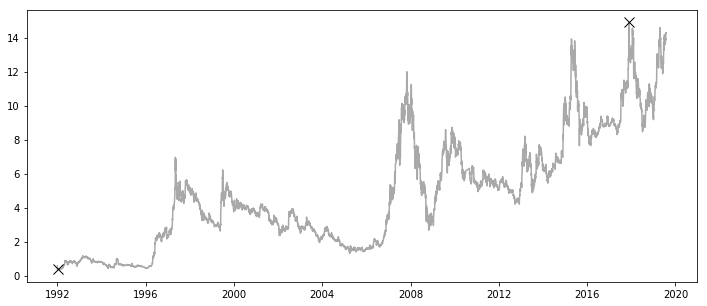

In [9]:
vbt.graphics.plot_line(rate_sr)

# indicators

Calculate EMA indicators.

In [10]:
fast_ma_sr = vbt.indicators.EMA(rate_sr, span=5)
slow_ma_sr = vbt.indicators.EMA(rate_sr, span=21)

# signals

Generate signals based on conditions.

    1. Go long whenever fast EMA is over slow EMA, while go short when opposite occurs.

In [11]:
ma_entries = vbt.signals.DMAC_entries(fast_ma_sr, slow_ma_sr)
ma_exits = vbt.signals.DMAC_exits(fast_ma_sr, slow_ma_sr)

Both, entry and exit vectors, are sequences of 0 and 1 (bit-vectors) to allow fast vector operations.

We reduce both vectors to contain only signals that are first in their sequences, since we are looking for crossover.

In [12]:
ma_entries = vbt.bitvector.first(ma_entries)
ma_exits = vbt.bitvector.first(ma_exits)

    2. Go short whenever price drops by 10%.

In [13]:
# trailstop_exits = vbt.signals.trailstop_exits(rate_sr, ma_entries, 0.1 * rate_sr)

Combine MA exit strategy with trailing stop and pick every first exit out of sequence.

In [14]:
# ma_exits = vbt.bitvector.OR(ma_exits, trailstop_exits)
# ma_exits = vbt.bitvector.first(ma_exits)

To apply an additional filter, generate your own bit-vector and use `vector.AND/OR/XOR` operations.

# positions

Generete positions out of both vectors (merge and reduce).

In [15]:
pos_sr = vbt.positions.from_signals(rate_sr, ma_entries, ma_exits)
pos_sr.head()

datetime
1992-01-31    1
1992-06-05   -1
1992-07-01    1
1992-08-14   -1
1992-09-14    1
dtype: int32

Position series is a binary series, where 1 = going long and -1 = going short. There is no two long/short positions in a row, since we want a clean way to evaluate a strategy (only the logic of a strategy must have an impact on the equity, not the investment size or its distribution)

Visualize entries and exits.

   count      mean       std    min      25%     50%     75%   max
0  176.0  0.076972  0.678822 -1.378 -0.20775 -0.0745  0.0135  2.92


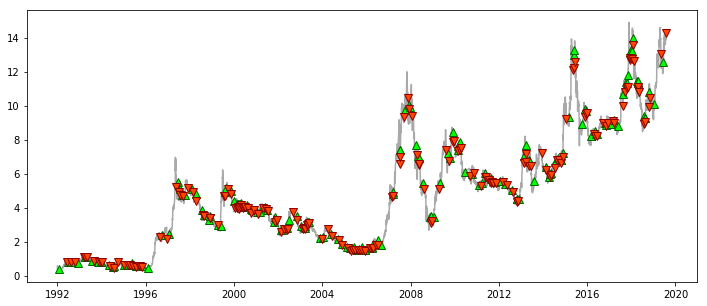

In [16]:
vbt.positions.plot(rate_sr, pos_sr)

# equity

Generate equity from positions, based on fees and slippage.

In [18]:
equity_sr = vbt.equity.from_positions(rate_sr, pos_sr, investment, fees, slippage)
equity_sr

datetime
1992-01-02            NaN
1992-01-03            NaN
1992-01-06            NaN
1992-01-07            NaN
1992-01-08            NaN
1992-01-09            NaN
1992-01-10            NaN
1992-01-13            NaN
1992-01-14            NaN
1992-01-15            NaN
1992-01-16            NaN
1992-01-17            NaN
1992-01-20            NaN
1992-01-21            NaN
1992-01-22            NaN
1992-01-23            NaN
1992-01-24            NaN
1992-01-27            NaN
1992-01-28            NaN
1992-01-29            NaN
1992-01-30            NaN
1992-01-31     990.262203
1992-02-01    1016.390493
1992-02-02    1045.131613
1992-02-10    1055.582929
1992-02-11    1024.228981
1992-02-12    1034.680297
1992-02-13    1042.518784
1992-02-14    1045.131613
1992-02-17    1034.680297
                 ...     
2019-06-20     888.206532
2019-06-21     927.997106
2019-06-24     923.276190
2019-06-25     925.299440
2019-06-26     894.950697
2019-06-27     910.462277
2019-06-28     925.973856
201

Equity is NaN before the first entry or if no positions were taken.

Visualize base and quote equities.

base: equity - hold
    count         mean          std           min           25%          50%  \
0  6531.0 -6171.811854  6649.020814 -24944.704342 -11023.640626 -3485.792623   

        75%          max  
0 -53.38896  2422.751414  


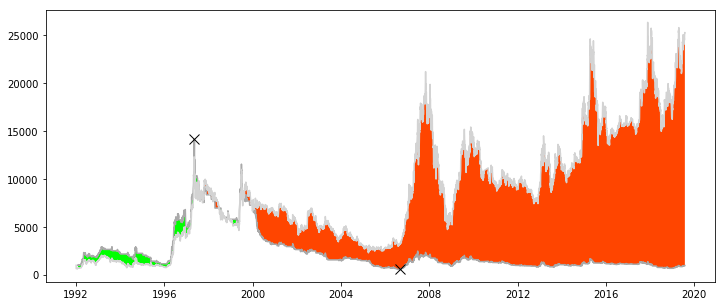

quote: equity - hold
    count        mean          std         min         25%          50%  \
0  6531.0 -774.933444  1041.046339 -1702.42356 -1587.42509 -1208.296108   

         75%         max  
0 -13.924103  3380.42245  


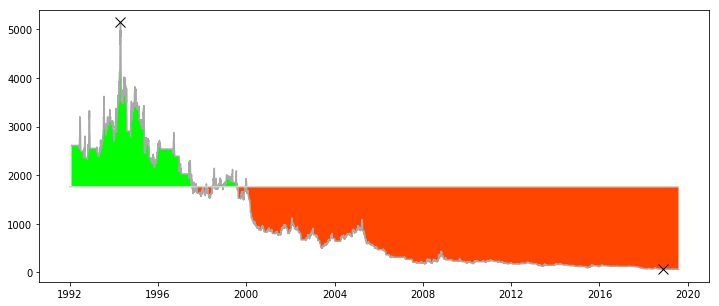

In [19]:
vbt.equity.plot(rate_sr, equity_sr)

# returns

Generate returns.

In [20]:
returns_sr = vbt.returns.from_equity(equity_sr)
returns_sr.head()

datetime
1992-01-02    0.0
1992-01-03    0.0
1992-01-06    0.0
1992-01-07    0.0
1992-01-08    0.0
dtype: float64

Draw returns.

    count      mean       std      min       25%  50%  75%       max
0  1440.0  0.000958  0.045065 -0.25232 -0.010407  0.0  0.0  0.369902


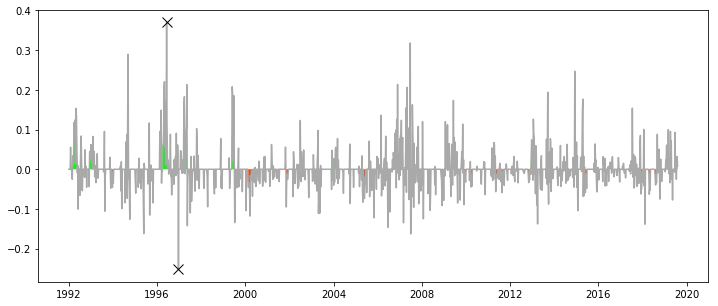

In [21]:
vbt.returns.plot(vbt.returns.resample(returns_sr, 'W'))

# performance

Print summary of multiple KPIs applied on returns.

In [22]:
vbt.performance.summary(returns_sr)

distribution         count         6552.000000
                     mean             0.000217
                     std              0.021208
                     min             -0.144234
                     25%             -0.002106
                     50%              0.000000
                     75%              0.000000
                     max              0.260197
performance          profit          -0.026101
                     avggain          0.023153
                     avgloss          0.018314
                     winrate          0.452479
                     expectancy      -0.000008
                     maxdd            0.960495
risk/return profile  sharpe           0.010225
                     sortino          0.011908
dtype: float64

# optimizer.gridsearch

The classic optimization method is grid search (or exhaustive search). It exhaustively generates candidates from a grid of parameter values and applies them on the series. 

This method brings some advantages:
- its simple to implement
- 2d-combinations can be visualized using heatmaps
- can be used to discover hidden patterns in combinations
- highly parallelizable

But also drawbacks are possible:
- not flexible enough to fit changing financial markets
- prone to overfitting
- no intermediate feedback

**Grid search consists of 3-4 levels:**

| Level | Motivation | Module | Structure |
|-|-|-|-|
| 1 | Calculate position/equity/returns maps | `srmap` | `{param: pd.Series}` |
| 2 | Calculate KPIs | `nummap` | `pd.Series` |
| 3 (optional) | Combine multiple KPIs into a single score and compare | `scoremap` | `pd.Series` |
| 4 | Build heatmap to examine hidden patterns | `matrix` | `pd.DataFrame` |

At the end we will be able to compare performance of different trading strategies.

## L1
## srmap

In [23]:
import vectorbt.optimizer.gridsearch as grids

Calculate returns for a set of MA window combinations.

    1. Precalculate all MAs.

In [24]:
# Init
ma_func = lambda span: vbt.indicators.EMA(rate_sr, span=span)
min_ma, max_ma, step = 1, 100, 1
fees = 0.0025

# Cache moving averages
param_range = grids.params.range_params(min_ma, max_ma, step)
ma_cache = dict(grids.srmap.from_func(ma_func, param_range))

cores: 4
processes: 1
starmap: False
calcs: 100 (~0.18s) ..
done. 0.11s


    2. For each MA combination, generate position series.

In [25]:
# Params
ma_space = grids.params.combine_rep_params(min_ma, max_ma, step, 2)

# Func
def ma_positions_func(fast_ma, slow_ma):
    # Cache
    fast_ma_sr = ma_cache[fast_ma]
    slow_ma_sr = ma_cache[slow_ma]
    # Signals
    entries = vbt.signals.DMAC_entries(fast_ma_sr, slow_ma_sr)
    entries = vbt.bitvector.first(entries)
    exits = vbt.signals.DMAC_exits(fast_ma_sr, slow_ma_sr)
    exits = vbt.bitvector.first(exits)
    # Positions
    pos_sr = vbt.positions.from_signals(rate_sr, entries, exits)
    return pos_sr

In [26]:
ma_positions_srmap = grids.srmap.from_func(ma_positions_func, ma_space)

cores: 4
processes: 1
starmap: True
calcs: 5050 (~13.30s) ..
done. 5.38s


    3. For each position series, generate returns series.

We need to separate position and returns calculation, since we need number of positions of each MA combination for a random map.

In [27]:
def ma_returns_func(fast_ma, slow_ma):
    # Equity
    pos_sr = ma_positions_srmap[(fast_ma, slow_ma)]
    equity_sr = vbt.equity.from_positions(rate_sr, pos_sr, investment, fees, slippage)
    # Returns
    returns_sr = vbt.returns.from_equity(equity_sr)
    return returns_sr

In [28]:
ma_returns_srmap = grids.srmap.from_func(ma_returns_func, ma_space)

cores: 4
processes: 1
starmap: True
calcs: 5050 (~12.31s) ..
done. 11.14s


For each MA window combination generate random positions of same length and resulting returns. 

In [29]:
# Params
random_space = [(fma, sma, len(np.flatnonzero(ma_positions_srmap[(fma, sma)].values))) for fma, sma in ma_space]

# Func
def random_returns_func(slow_ma, fast_ma, n):
    # Positions
    pos_sr = vbt.positions.random(rate_sr, n)
    # Equity
    equity_sr = vbt.equity.from_positions(rate_sr, pos_sr, investment, fees, slippage)
    # Returns
    returns_sr = vbt.returns.from_equity(equity_sr)
    return returns_sr

In [30]:
random_returns_srmap = grids.srmap.from_func(random_returns_func, random_space)

cores: 4
processes: 1
starmap: True
calcs: 5050 (~166.93s) ..
done. 16.69s


## L2
## nummap

Apply KPI on each returns series.

In [31]:
if_i_hold = vbt.performance.profit(rate_sr.pct_change())
profit = lambda r: vbt.performance.profit(r) - if_i_hold
ma_profit_nummap = grids.nummap.from_srmap(ma_returns_srmap, vbt.performance.profit)

cores: 4
processes: 1
starmap: False
calcs: 5050 (~7.02s) ..
done. 4.39s
min (1, 2): -0.9999999999951118
max (25, 88): 115.2245840135671


In [32]:
sharpe = lambda r: vbt.performance.sharpe(r, nperiods=252)
ma_sharpe_nummap = grids.nummap.from_srmap(ma_returns_srmap, sharpe)

cores: 4
processes: 1
starmap: False
calcs: 5050 (~3.09s) ..
done. 0.48s
min (1, 2): -2.53809389288428
max (25, 88): 0.7141917133548366


In [33]:
random_profit_nummap = grids.nummap.from_srmap(random_returns_srmap, vbt.performance.profit)

cores: 4
processes: 1
starmap: False
calcs: 5050 (~6.84s) ..
done. 4.34s
min (1, 2, 2591): -0.9999999999725
max (60, 77, 49): 236.50038645860613


Compare quantile distributions of EMA and random strategy.

            count      mean        std  min        25%        50%        75%  \
nummap     5050.0  40.71107  27.584531 -1.0  16.709700  41.734471  63.188607   
benchmark  5050.0   4.62208  12.522365 -1.0  -0.302004   0.907313   4.300538   

                  max  
nummap     115.224584  
benchmark  236.500386  


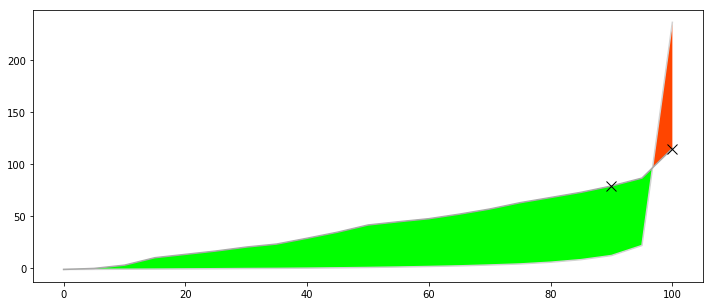

In [34]:
grids.nummap.compare_quantiles(ma_profit_nummap, random_profit_nummap)

Compare their KPI distributions.

            count      mean        std  min        25%        50%        75%  \
nummap     5050.0  40.71107  27.584531 -1.0  16.709700  41.734471  63.188607   
benchmark  5050.0   4.62208  12.522365 -1.0  -0.302004   0.907313   4.300538   

                  max  
nummap     115.224584  
benchmark  236.500386  


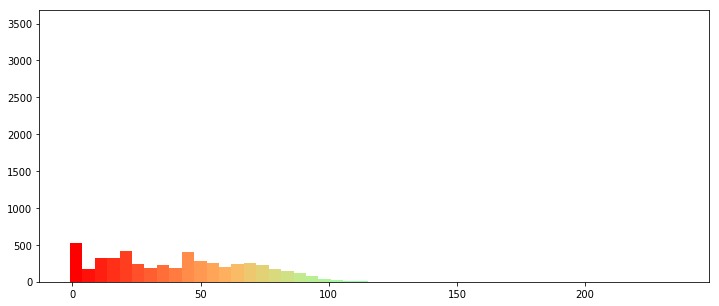

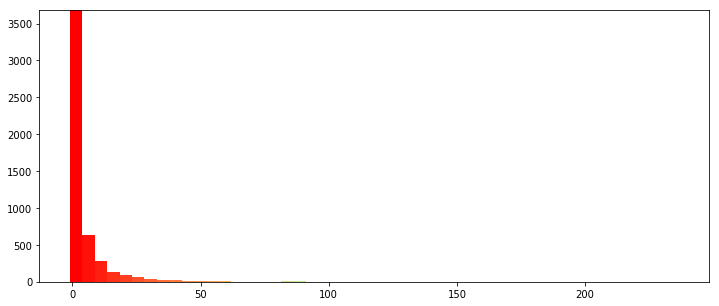

In [35]:
cmap = plt.cm.rainbow_r
norm = plt.Normalize()
grids.nummap.compare_hists(ma_profit_nummap, random_profit_nummap, 50, cmap, norm)

## L3
## scoremap

Take into account multiple weighted KPIs and generate a score from 1 to 100.

In [36]:
ma_scoremap = grids.scoremap.from_nummaps([ma_profit_nummap, ma_sharpe_nummap], [2/3, 1/3], [False, False])

done. 0.00s
min (1, 2): 1.0
max (25, 88): 99.99999999999999


## L4
## matrix

Reshape 2d-parameter grid into a matrix.

In [37]:
ma_matrix = grids.matrix.from_nummap(ma_profit_nummap, symmetric=True).fillna(0)

done. 1.89s


Display as a heatmap.

     count       mean        std  min        25%        50%        75%  \
0  10000.0  41.118181  27.417125 -1.0  17.342252  42.044429  63.429083   

          max  
0  115.224584  


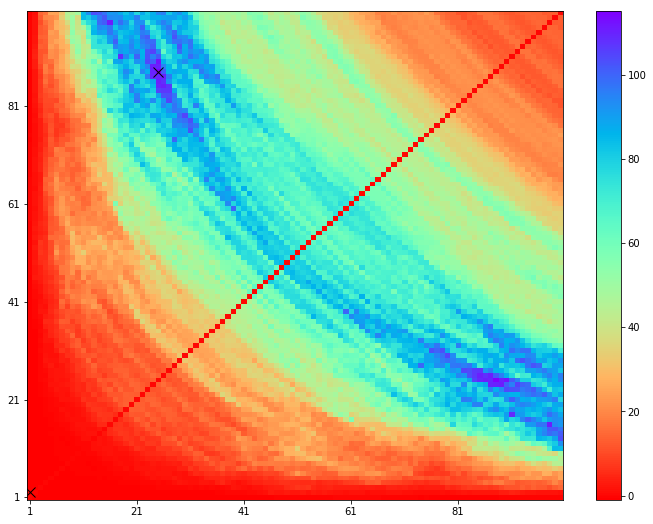

In [38]:
cmap = plt.cm.rainbow_r
norm = plt.Normalize()
matplotlib.rcParams['figure.figsize'] = (12, 9)
grids.matrix.plot(ma_matrix, cmap, norm)
matplotlib.rcParams['figure.figsize'] = (12, 5)